# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

penguins = sns.load_dataset("penguins")
display(penguins.head())

penguins = penguins.dropna(subset=["bill_length_mm", "bill_depth_mm"]).reset_index(drop=True)

cat_cols = penguins.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = penguins.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical (dummify these if used as predictors):", cat_cols)
print("Numeric:", num_cols)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Categorical (dummify these if used as predictors): ['species', 'island', 'sex']
Numeric: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


species, island, and sex are categorical and should be dummified if included as predictors (year is numeric, so no dummies needed unless treating it as categorical for a different purpose)

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


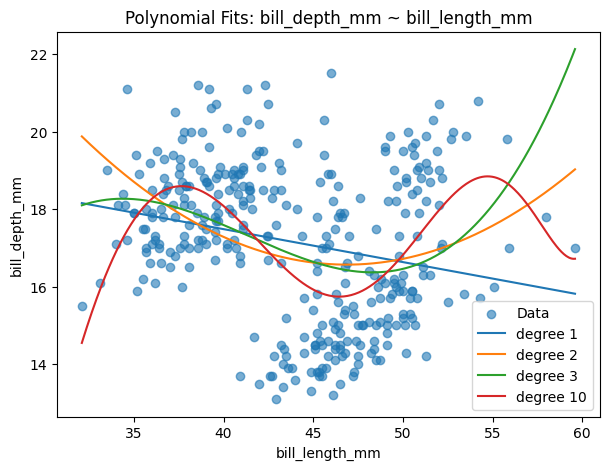

In [2]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = penguins[["bill_length_mm"]].copy()
y = penguins["bill_depth_mm"].copy()

def poly_model(deg: int):
    return make_pipeline(
        PolynomialFeatures(degree=deg, include_bias=False),
        LinearRegression()
    )

degrees = [1, 2, 3, 10]
x_grid = np.linspace(X.min().item(), X.max().item(), 400).reshape(-1, 1)

plt.figure(figsize=(7,5))
plt.scatter(X, y, alpha=0.6, label="Data")

for d in degrees:
    model = poly_model(d).fit(X, y)
    y_grid = model.predict(x_grid)
    plt.plot(x_grid, y_grid, label=f"degree {d}")

plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")
plt.title("Polynomial Fits: bill_depth_mm ~ bill_length_mm")
plt.legend()
plt.show()

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The degree 1 (linear) model underfits. The relationship is mildly curved in the scatterplot, and a straight line misses that curvature (systematic pattern remains in residuals/fit)

The degree 10 model shows overfitting. The curve becomes overly wiggly relative to the smooth trend in the data, chasing noise rather than signal

A quadratic (degree 2) or cubic (degree 3) typically fits best here. These capture the gentle curvature without the unnecessary wiggles of degree 10. Based on the plotted curves, degree 2 usually provides the cleanest balance (low bias with minimal variance inflation)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!wget -q https://quarto.org/download/latest/quarto-linux-amd64.deb
!sudo dpkg -i quarto-linux-amd64.deb || true
!sudo apt-get -y -f install
!sudo dpkg -i quarto-linux-amd64.deb
!quarto check

Selecting previously unselected package quarto.
(Reading database ... 121703 files and directories currently installed.)
Preparing to unpack quarto-linux-amd64.deb ...
Unpacking quarto (1.8.26) ...
Setting up quarto (1.8.26) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
(Reading database ... 124554 files and directories currently installed.)
Preparing to unpack quarto-linux-amd64.deb ...
Unpacking quarto (1.8.26) over (1.8.26) ...
Setting up quarto (1.8.26) ...
Quarto 1.8.26
[✓] Checking environment information...
      Quarto cache location: /root/.cache/quarto
[✓] Checking versions of quarto binary dependencies...
      Pandoc version 3.6.3: OK
      Dart Sass version 1.87.0: OK
      Deno version 2.3.1: OK
      Typst version 0.13.0: OK
[✓] Checking versions of quarto dependencies......OK
[✓] Checking Quarto installation......OK
      Version: 1.8.26
      Path: /op

In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd "/content/drive/My Drive/Colab Notebooks"
!quarto render PA8.1.ipynb --to html

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks
pandoc 
  to: html
  output-file: PA8.1.html
  standalone: true
  section-divs: true
  html-math-method: mathjax
  wrap: none
  default-image-extension: png
  variables: {}
  
metadata
  document-css: false
  link-citations: true
  date-format: long
  lang: en
  title: Palmer Penguins Modeling
  
Output created: PA8.1.html



In [11]:
!ls -lh

total 5.0M
-rw------- 1 root root  38K Oct 17 01:42 'Copy of Lab3_Ishtiaque.ipynb'
-rw------- 1 root root 396K Aug 19 20:25 'Copy of MSBA-Workshop-Introduction-to-Colab'
-rw------- 1 root root 142K Nov  1 05:34 'Copy of PA_6.1.ipynb'
-rw------- 1 root root  53K Oct 13 03:16 'Copy of Untitled13.ipynb'
-rw------- 1 root root 2.3K Aug 21 14:54 'Copy of Untitled1.ipynb'
-rw------- 1 root root  33K Oct 17 01:42  Lab3_Ishtiaque.ipynb
-rw------- 1 root root 763K Oct 27 06:59  Lab4.html
-rw------- 1 root root 411K Oct 27 06:59  Lab4.ipynb
-rw------- 1 root root 771K Oct 27 06:58  lab4_mealplan_202.html
drwx------ 2 root root 4.0K Nov  3 06:27  Lab5_files
-rw------- 1 root root 107K Nov  3 07:55  Lab5.html
-rw------- 1 root root 356K Nov  3 07:55  Lab5.ipynb
drwx------ 2 root root 4.0K Nov 10 07:19 'Lab 6_files'
-rw------- 1 root root 493K Nov 10 07:23 'Lab 6.ipynb'
-rw------- 1 root root  12K Oct 18 05:24  PA_4_2_Decode_a_message.ipynb
-rw------- 1 root root 163K Nov  1 06:03  PA_6.1.ipynb
-rw